# Healthcare for All dataset

In [1]:
# Improve cost-effectiveness of direct marketing. Develop model that will help maximise the net revenue generated 
# Maximise TARGET_D: total dollar amount donated by each responder
# TARGET_B: people that responded to the email
# Challenges:
# Large number of features (almost 500 columns)
# Sparcity
# Data imbalance

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('learningSet.csv')

C:\Users\garpa\AppData\Local\Temp\ipykernel_14528\3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [4]:
data

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [5]:
data.shape

(95412, 481)

In [6]:
data.info

<bound method DataFrame.info of        ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE   DOB NOEXCH  \
0         8901     GRI      0    IL  61081                    3712      0   
1         9401     BOA      1    CA  91326                    5202      0   
2         9001     AMH      1    NC  27017                       0      0   
3         8701     BRY      0    CA  95953                    2801      0   
4         8601              0    FL  33176                    2001      0   
...        ...     ...    ...   ...    ...      ...      ...   ...    ...   
95407     9601     ASE      1    AK  99504                       0      0   
95408     9601     DCD      1    TX  77379                    5001      0   
95409     9501     MBC      1    MI  48910                    3801      0   
95410     8601     PRV      0    CA  91320                    4005      0   
95411     8801     MCC      2    NC  28409                    1801      0   

      RECINHSE  ... TARGET_D HPHONE_D RFA_2

In [7]:
# TARGET_B: number of people that responded to an email. Use Classification Model.
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [8]:
# TAGER_D: amount of money donated by the responders. User Regression Model.
data['TARGET_D'].sum()

75668.7

## Look at Null Values

In [9]:
# pd.set_option('display.max_rows', None)
nulls_df = pd.DataFrame(data.isna().sum()*100 / len(data))
nulls_df.columns = ['nulls_percentage']
nulls_df_25 = nulls_df[nulls_df.nulls_percentage > 25 ].sort_values(by=['nulls_percentage'], ascending=False)
nulls_df_25

,nulls_percentage
RAMNT_5,99.990567
RDATE_5,99.990567
RAMNT_3,99.746363
RDATE_3,99.746363
RAMNT_4,99.705488
...,...
ADATE_5,35.205215
ADATE_10,34.322727
ADATE_17,28.979583
ADATE_22,26.881315


In [10]:
len(nulls_df_25)

72

In [11]:
# Drop columns with Null values more than 25%
nulls_df_25_columns = nulls_df[nulls_df.nulls_percentage > 25 ].sort_values(by=['nulls_percentage'], ascending=False).index
nulls_df_25_columns

Index(['RAMNT_5', 'RDATE_5', 'RAMNT_3', 'RDATE_3', 'RAMNT_4', 'RDATE_4',
       'RDATE_6', 'RAMNT_6', 'RAMNT_15', 'RDATE_15', 'RAMNT_23', 'RDATE_23',
       'RAMNT_20', 'RDATE_20', 'RAMNT_7', 'RDATE_7', 'RDATE_17', 'RAMNT_17',
       'RDATE_21', 'RAMNT_21', 'RDATE_10', 'RAMNT_10', 'RAMNT_13', 'RDATE_13',
       'NUMCHLD', 'RAMNT_11', 'RDATE_11', 'RAMNT_19', 'RDATE_19', 'RDATE_9',
       'RAMNT_9', 'RDATE_24', 'RAMNT_24', 'RAMNT_18', 'RDATE_18', 'RDATE_22',
       'RAMNT_22', 'RAMNT_8', 'RDATE_8', 'RDATE_14', 'RAMNT_14', 'RDATE_12',
       'RAMNT_12', 'RDATE_16', 'RAMNT_16', 'ADATE_15', 'ADATE_23', 'MBCOLECT',
       'MBGARDEN', 'MBBOOKS', 'MBCRAFT', 'MAGFAML', 'MAGFEM', 'MAGMALE',
       'PUBGARDN', 'PUBDOITY', 'PUBCULIN', 'PUBHLTH', 'PUBNEWFN', 'PUBPHOTO',
       'PUBOPP', 'ADATE_20', 'WEALTH1', 'WEALTH2', 'ADATE_13', 'ADATE_24',
       'ADATE_21', 'ADATE_5', 'ADATE_10', 'ADATE_17', 'ADATE_22', 'ADATE_19'],
      dtype='object')

In [12]:
cols = ['WEALTH1', 'WEALTH2']
cols_to_drop = list(nulls_df_25_columns)

for item in cols:
    cols_to_drop.remove(item)

In [13]:
data = data.drop(cols_to_drop, axis=1)
pd.set_option('display.max_columns', None)


In [14]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,F,NaN,0,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,,,,XXXX,S1,14,46.0,E,H,,,,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,,,,9.0,2,,,,,,,,,,,,,,,,,,,,,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83

In [15]:
data.MAILCODE.unique()
data.MAILCODE.value_counts()

     94013
B     1399
Name: MAILCODE, dtype: int64

In [16]:
data['MAILCODE'] = data.MAILCODE.replace(" ", "A")

In [17]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,F,NaN,0,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,,5202,0,,,,,XXXX,S1,14,46.0,E,H,,,,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,,,,9.0,2,,,,,,,,,,,,,,,,,,,,,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,

In [18]:
data.MAILCODE.value_counts()

A    94013
B     1399
Name: MAILCODE, dtype: int64

In [19]:
data.PVASTATE.unique()

array([' ', 'P', 'E'], dtype=object)

In [20]:
data = data.replace(" ", np.nan)

In [21]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,NaN,3712,0,NaN,NaN,NaN,NaN,XXXX,T2,36,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,0,NaN,0,39,34,18,10,2,1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,NaN,5202,0,NaN,NaN,NaN,NaN,XXXX,S1,14,46.0,E,H,NaN,NaN,NaN,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,NaN,NaN,NaN,9.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,

In [22]:
# Keep using the same file.

# Remove columns with null values more than a specified threshold.
# Now just like the last time we will discuss it other subject matter experts and keep the following columns -> wealth1, wealth2, VETERANS, SOLIH.

In [23]:
nulls_df = pd.DataFrame(data.isna().sum()*100 / len(data))
nulls_df.columns = ['nulls_percentage']
nulls_df_25 = nulls_df[nulls_df.nulls_percentage > 25 ].sort_values(by=['nulls_percentage'], ascending=False).index
nulls_df_25

Index(['RECPGVG', 'SOLP3', 'MAJOR', 'PLATES', 'HOMEE', 'CARDS', 'CHILD03',
       'PVASTATE', 'KIDSTUFF', 'CHILD07', 'RECSWEEP', 'CHILD12', 'RECP3',
       'BOATS', 'CHILD18', 'PHOTO', 'COLLECT1', 'SOLIH', 'RECINHSE', 'FISHER',
       'CATLG', 'CRAFTS', 'BIBLE', 'VETERANS', 'PCOWNERS', 'WALKER', 'CDPLAY',
       'STEREO', 'GARDENIN', 'PETS', 'GEOCODE', 'RFA_15', 'RFA_23', 'LIFESRC',
       'RFA_20', 'PEPSTRFL', 'WEALTH1', 'WEALTH2', 'RFA_13', 'RFA_24',
       'RFA_21', 'RFA_5', 'RFA_10', 'AGEFLAG', 'RFA_17', 'RFA_22', 'RFA_19'],
      dtype='object')

In [24]:
cols = ['WEALTH1', 'WEALTH2', 'VETERANS','SOLIH']
cols_to_drop = list(nulls_df_25)

for item in cols:
    cols_to_drop.remove(item)

In [25]:
len(cols_to_drop)

43

In [26]:
df = data.drop(cols_to_drop, axis=1)

In [27]:
nulls_df = pd.DataFrame(df.isna().sum()*100 / len(data))

In [28]:
df.shape

(95412, 368)

## Split Numerical and Categorical. Separate Y values.

In [29]:
df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,DOB,NOEXCH,MDMAUD,DOMAIN,CLUSTER,AGE,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLIH,WEALTH2,VETERANS,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,3712,0,XXXX,T2,36,60.0,NaN,NaN,F,NaN,0,NaN,0,39,34,18,10,2,1,NaN,5.0,NaN,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,5202,0,XXXX,S1,14,46.0,H,6.0,M,9.0,16,3,0,15,55,11,6,2,1,NaN,9.0,NaN,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92

In [151]:
len(Y)

95412

In [146]:
Y.to_csv('target.csv')

In [31]:
numerical = df.select_dtypes(include = ('int', 'float'))

In [32]:
numerical = numerical.drop(columns=Y.columns)

In [33]:
categorical = df.select_dtypes(include= 'object')

In [34]:
# Replace States with less than people with OTHER
state_df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()
state_df.columns = ['state', 'count']
state_df.head()

,state,count
0,CA,17343
1,FL,8376
2,TX,7535
3,IL,6420
4,MI,5654


In [35]:
other_states = list(state_df[state_df['count']<2500]['state'])
print(other_states)

['TN', 'AZ', 'OR', 'MN', 'CO', 'SC', 'AL', 'KY', 'OK', 'LA', 'KS', 'IA', 'AR', 'MS', 'NV', 'NM', 'NE', 'UT', 'ID', 'MT', 'HI', 'SD', 'WY', 'AK', 'ND', 'AP', 'NY', 'VA', 'OH', 'PA', 'MD', 'NJ', 'MA', 'CT', 'AA', 'AE', 'ME', 'NH', 'VT', 'RI', 'VI', 'WV', 'GU', 'DE', 'DC', 'AS']


In [36]:
def clean_state(x):
    if x in other_states:
        return 'OTHER'
    else:
        return x

In [37]:
categorical['STATE'] = categorical['STATE'].apply(clean_state)

In [38]:
categorical['STATE'].value_counts()

OTHER    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

In [39]:
categorical['DOMAIN'].value_counts()

R2    13623
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

In [40]:
categorical['DOMAIN'].isna().sum()*100 / len(categorical)

2.427367626713621

In [41]:
# Replace null values with the mode
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [42]:
categorical['DOMAIN'].isna().sum()*100 / len(categorical)

0.0

In [43]:
categorical['DOMAIN'][0][0]

'T'

In [44]:
categorical['DOMAIN_A'] = categorical['DOMAIN'].apply(lambda x: x[0])

In [45]:
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,DOMAIN,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A
0,GRI,IL,61081,A,0,XXXX,T2,36,NaN,F,NaN,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C,T
1,BOA,CA,91326,A,0,XXXX,S1,14,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,NaN,L1E,NaN,L,G,X,X,X,A,S
2,AMH,NC,27017,A,0,XXXX,R2,43,U,M,3,NaN,NaN,L4E,S4E,S4E,S4E,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4D,L,E,X,X,X,C,R
3,BRY,CA,95953,A,0,XXXX,R2,44,U,F,3,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S2D,L,E,X,X,X,C,R
4,NaN,FL,33176,A,0,XXXX,S2,16,H,F,3,12,NaN,L2F,A2F,A2F,A1D,I2D,A1E,A1E,A1E,A1E,L3D,L3D,A2D,L,F,X,X,X,A,S


In [46]:
categorical['DOMAIN_B'] = categorical['DOMAIN'].apply(lambda x: x[1])

In [47]:
categorical

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,DOMAIN,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,GRI,IL,61081,A,0,XXXX,T2,36,NaN,F,NaN,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C,T,2
1,BOA,CA,91326,A,0,XXXX,S1,14,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,NaN,L1E,NaN,L,G,X,X,X,A,S,1
2,AMH,NC,27017,A,0,XXXX,R2,43,U,M,3,NaN,NaN,L4E,S4E,S4E,S4E,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4D,L,E,X,X,X,C,R,2
3,BRY,CA,95953,A,0,XXXX,R2,44,U,F,3,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S2D,L,E,X,X,X,C,R,2
4,NaN,FL,33176,A,0,XXXX,S2,16,H,F,3,12,NaN,L2F,A2F,A2F,A1D,I2D,A1E,A1E,A1E,A1E,L3D,L3D,A2D,L,F,X,X,X,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,OTHER,99504,A,0,XXXX,C2,27,NaN,M,NaN,NaN,NaN,L1G,F1G,F1G,F1G,P1G,P1G,NaN,NaN,NaN,NaN,NaN,NaN,L,G,X,X,X,C,C,2
95408,DCD,TX,77379,A,0,XXXX,C1,24,H,M,3,NaN,NaN,L1F,NaN,NaN,NaN,P1F,P1F,NaN,NaN,NaN,NaN,NaN,NaN,L,F,X,X,X,A,C,1
95409,MBC,MI,48910,A,0,XXXX,C3,30,NaN,M,NaN,NaN,NaN,L3E,S4E,S4E,S3E,NaN,A2E,N3E,N3E,N3E,N3E,F1D,F1D,L,E,X,X,X,B,C,3
95410,PRV,CA,91320,A,0,XXXX,C1,24,H,F,2,12,NaN,L4F,S4F,A3F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S3F,S2F,L,F,X,X,X,A,C,1


In [48]:
categorical = categorical.drop(columns=['DOMAIN'])

In [49]:
#Use the method value_counts on the columns MAILCODE, NOEXCH, and MDMAUD and check the proportion of category representation in those columns. 
# Since there is a huge imbalance in the representation of category/categories, we will remove this column. 
# Add those columns to the drop_list.

print(categorical['MAILCODE'].value_counts())
print(categorical['NOEXCH'].value_counts())
print(categorical['MDMAUD'].value_counts())

A    94013
B     1399
Name: MAILCODE, dtype: int64
0    61203
0    33882
1      195
1       90
X       35
Name: NOEXCH, dtype: int64
XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64


In [50]:
drop_list = ['MAILCODE', 'NOEXCH', 'MDMAUD', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A']

In [51]:
for col in categorical.columns:
    if 'RFA' in col:
        drop_list.append(col)

In [52]:
# for x in drop_list:
#     if "RFA_2" in x:
#         drop_list.remove(x)

In [53]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')

In [54]:
drop_list

['MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18']

In [55]:
categorical = categorical.drop(columns=drop_list)

In [56]:
categorical.isna().sum()*100 / len(categorical)

OSOURCE      0.972624
STATE        0.000000
ZIP          0.000000
CLUSTER      2.427368
HOMEOWNR    23.296860
GENDER       3.099191
DATASRCE    22.303274
SOLIH       93.501866
VETERANS    89.072653
RFA_2R       0.000000
RFA_2A       0.000000
GEOCODE2     0.334339
DOMAIN_A     0.000000
DOMAIN_B     0.000000
dtype: float64

In [57]:
# Fill CLUSTER null values with the mode

categorical['CLUSTER'].value_counts()
categorical['CLUSTER'] = categorical['CLUSTER'].fillna(40)

In [58]:
categorical.isna().sum()*100 / len(categorical)

OSOURCE      0.972624
STATE        0.000000
ZIP          0.000000
CLUSTER      0.000000
HOMEOWNR    23.296860
GENDER       3.099191
DATASRCE    22.303274
SOLIH       93.501866
VETERANS    89.072653
RFA_2R       0.000000
RFA_2A       0.000000
GEOCODE2     0.334339
DOMAIN_A     0.000000
DOMAIN_B     0.000000
dtype: float64

In [59]:
# Fill HOMEOWNR null values with the 'U' value (indefined)
print(categorical['HOMEOWNR'].value_counts())
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna(40)

H    52354
U    20830
Name: HOMEOWNR, dtype: int64


In [60]:
categorical.isna().sum()*100 / len(categorical)

OSOURCE      0.972624
STATE        0.000000
ZIP          0.000000
CLUSTER      0.000000
HOMEOWNR     0.000000
GENDER       3.099191
DATASRCE    22.303274
SOLIH       93.501866
VETERANS    89.072653
RFA_2R       0.000000
RFA_2A       0.000000
GEOCODE2     0.334339
DOMAIN_A     0.000000
DOMAIN_B     0.000000
dtype: float64

In [61]:
# Replace null values in the columns DATASRCE and GEOCODE2.
# Remove the columns starting with ADATE_. 
# We are assuming that the date when the previous mail was done is not significant in the respondents decision to give donation. 
# They may or may not even remember when they received the mail in the previous years. 
# And for the column ADATE_2, check the values in the column. 
# If the values are pretty much the same, then remove this column as well.

print(categorical['DATASRCE'].value_counts())
print(categorical['GEOCODE2'].value_counts())
categorical['DATASRCE'] = categorical['DATASRCE'].fillna(3)
# categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('C')

3    43549
2    23455
1     7128
Name: DATASRCE, dtype: int64
A    34484
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64


In [62]:
null_rows = categorical[categorical['DATASRCE'].isnull()]
null_rows

,OSOURCE,STATE,ZIP,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B


In [63]:
drop_list = []
for col in numerical.columns:
    if "ADATE" in col:
        drop_list.append(col)  

In [64]:
len(drop_list)
numerical = numerical.drop(drop_list, axis=1)

In [65]:
numerical.shape

(95412, 322)

In [66]:
df = pd.DataFrame(numerical.isna().sum()*100/len(numerical)).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0].sort_values(by='nulls', ascending=False)

,column_name,nulls
5,WEALTH1,46.882992
14,WEALTH2,45.930281
3,AGE,24.802960
4,INCOME,22.309563
315,NEXTDATE,10.452564
316,TIMELAG,10.452564
135,MSA,0.138347
136,ADI,0.138347
137,DMA,0.138347
321,CLUSTER2,0.138347


<AxesSubplot:xlabel='AGE', ylabel='Count'>

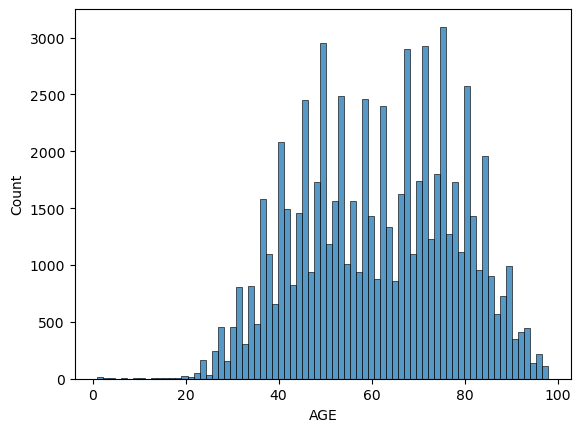

In [67]:
import seaborn as sns
sns.histplot(numerical['AGE'])

In [68]:
# Fill 'AGE' null values with the mean
numerical['AGE'] = numerical['AGE'].fillna(numerical['AGE'].mean())

<AxesSubplot:xlabel='AGE', ylabel='Count'>

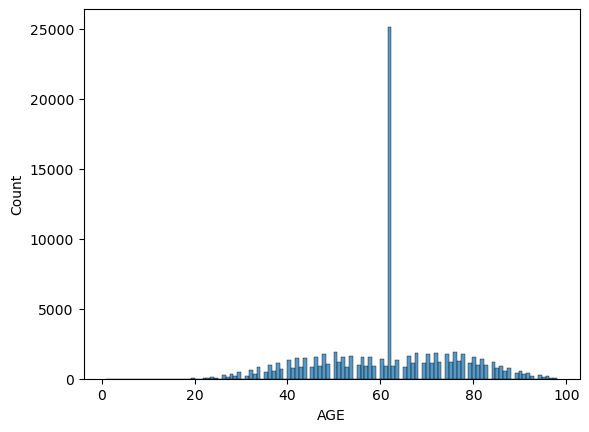

In [69]:
sns.histplot(numerical['AGE'])

<AxesSubplot:xlabel='INCOME', ylabel='Count'>

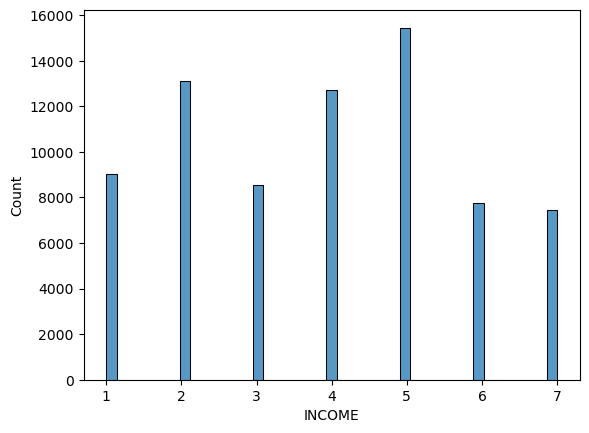

In [70]:
# Transform Income to a categorical column and fill null values with '0' (assume is no salary).
sns.histplot(numerical['INCOME'])


In [71]:
numerical['INCOME'] = numerical.INCOME.astype('object')

In [72]:
numerical['INCOME'] = numerical.INCOME.fillna('0')

<AxesSubplot:xlabel='CLUSTER2', ylabel='Count'>

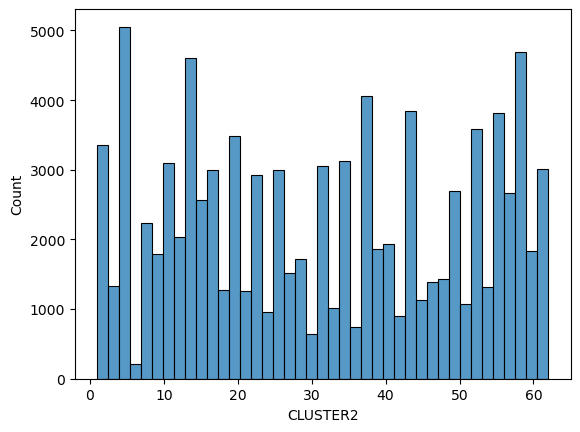

In [73]:
sns.histplot(numerical['CLUSTER2'])

In [74]:
numerical['CLUSTER2'] = numerical.CLUSTER2.fillna(round(numerical.CLUSTER2.mean()))

<AxesSubplot:xlabel='CLUSTER2', ylabel='Count'>

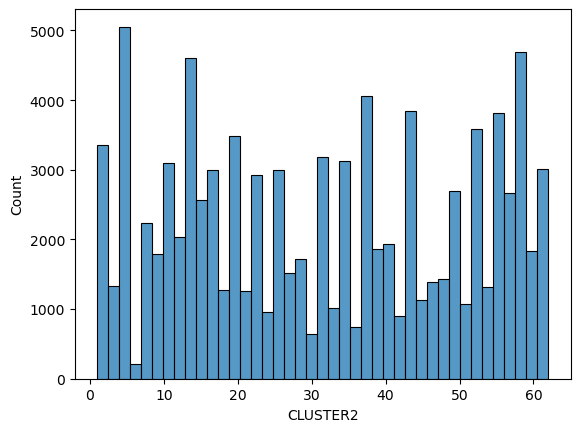

In [75]:
sns.histplot(numerical['CLUSTER2'])

## Activity 3

In [76]:
# Check if there are any other null values in the numerical data.

# Clean the columns WEALTH2 and TIMELAG. Use appropriate method to fill the null values in these columns.
df[df['nulls']>0].sort_values(by='nulls', ascending=False)

,column_name,nulls
5,WEALTH1,46.882992
14,WEALTH2,45.930281
3,AGE,24.802960
4,INCOME,22.309563
315,NEXTDATE,10.452564
316,TIMELAG,10.452564
135,MSA,0.138347
136,ADI,0.138347
137,DMA,0.138347
321,CLUSTER2,0.138347


In [77]:
# Fill null values in WEALTH2 using the mean
numerical['WEALTH2'].value_counts()

9.0    6523
8.0    5975
7.0    5684
6.0    5497
5.0    5351
4.0    5074
3.0    5046
2.0    4971
1.0    4191
0.0    3277
Name: WEALTH2, dtype: int64

<AxesSubplot:xlabel='WEALTH2', ylabel='Count'>

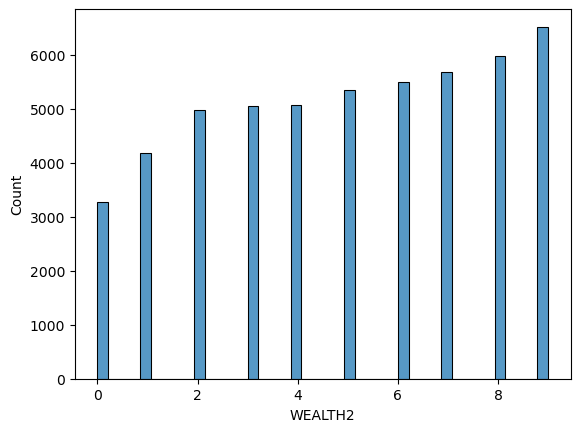

In [78]:
sns.histplot(numerical['WEALTH2'])

In [79]:
numerical.WEALTH2.mode()

0    9.0
Name: WEALTH2, dtype: float64

In [80]:
numerical['WEALTH2'] = numerical.WEALTH2.fillna('9')

<AxesSubplot:xlabel='WEALTH2', ylabel='Count'>

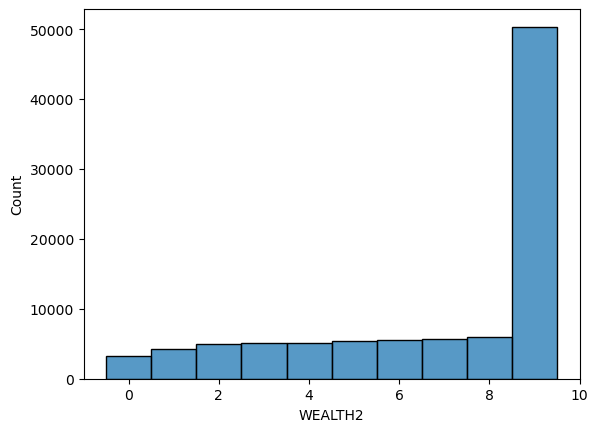

In [81]:
sns.histplot(numerical['WEALTH2'])

In [82]:
[df['nulls']>0].sort_values(by='nulls', ascending=False)

AttributeError: 'list' object has no attribute 'sort_values'

<AxesSubplot:xlabel='TIMELAG', ylabel='Count'>

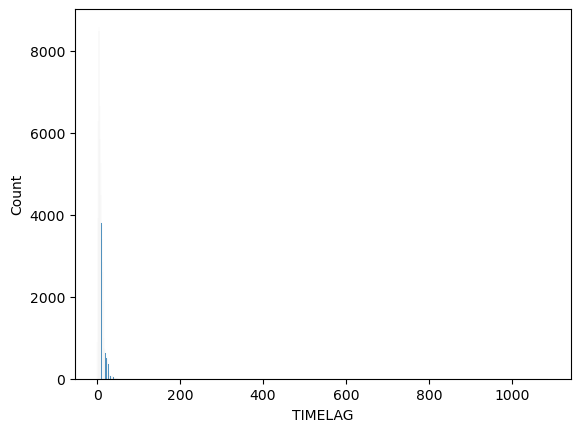

In [87]:
sns.histplot(numerical['TIMELAG'])

In [90]:
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(round(np.mean(numerical['TIMELAG'])))

In [91]:
numerical['TIMELAG'].isna().sum()

0

In [95]:
categorical.to_csv('categorical.csv')

In [96]:
numerical.to_csv('numerical.csv')

# Lab Feature Engineering

In [ ]:
# Lab | Feature engineering

# In this lab, you will use learningSet.csv file which you have already cloned in the previous activities.
# Instructions
# Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.


# Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
# Use appropriate EDA technique where ever necessary.

In [100]:
# Check for null values in the numerical columns.
# Use appropriate methods to clean the columns WEALTH1, ADI, DMA and MSA.

numerical_nulls = pd.DataFrame(numerical.isna().sum()).reset_index()
numerical_nulls.columns = ['column_name', 'nulls']
numerical_nulls[numerical_nulls['nulls']>0]

,column_name,nulls
5,WEALTH1,44732
135,MSA,132
136,ADI,132
137,DMA,132
315,NEXTDATE,9973


<AxesSubplot:xlabel='WEALTH1', ylabel='Count'>

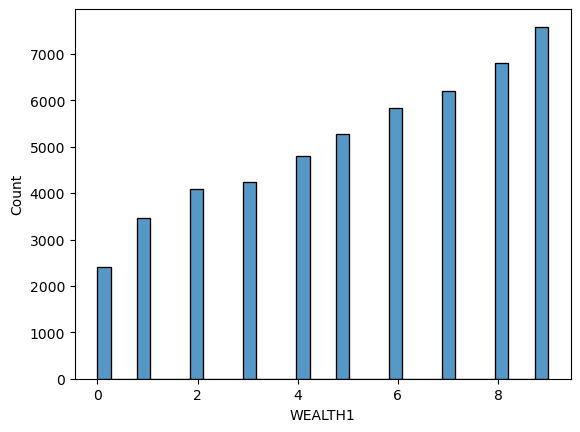

In [102]:
sns.histplot(numerical['WEALTH1'])

In [113]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(9.0)

<AxesSubplot:xlabel='WEALTH1', ylabel='Count'>

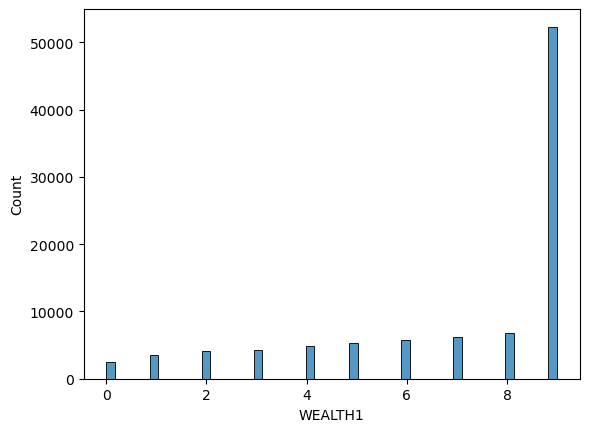

In [115]:
sns.histplot(numerical['WEALTH1'])

In [118]:
numerical_nulls = pd.DataFrame(numerical.isna().sum()).reset_index()
numerical_nulls.columns = ['column_name', 'nulls']
numerical_nulls[numerical_nulls['nulls']>0]

,column_name,nulls
135,MSA,132
136,ADI,132
137,DMA,132
315,NEXTDATE,9973


In [ ]:
# Drop NEXTDATE column

In [119]:
numerical = numerical.drop(['NEXTDATE'], axis=1)

In [120]:
numerical_nulls = pd.DataFrame(numerical.isna().sum()).reset_index()
numerical_nulls.columns = ['column_name', 'nulls']
numerical_nulls[numerical_nulls['nulls']>0]

,column_name,nulls
135,MSA,132
136,ADI,132
137,DMA,132


In [ ]:
# ADI, DMA and MSA.

In [122]:
numerical[numerical['ADI'].isna()]

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
577,8601,2,708,90.000000,2.0,9.0,0,3,36,21,34,9,3,0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,70,5,11,108.0,16,12,3.0,8904,10.0,9505,10.0,9505,8703,11.0,6.750000,45057,1,1,32.0
1119,8601,0,0,61.611649,0,9.0,0,0,42,8,75,11,0,0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,71,5,12,119.0,14,11,5.0,9003,15.0,9105,15.0,9510,8611,4.0,8.500000,45323,0,1,32.0
2250,8801,1,6201,36.000000,2.0,3.0,4,0,27,28,31,8,8,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,56,6,12,155.0,6,3,20.0,8906,30.0,9207,30.0,9512,8901,5.0,25.833333,30917,1,1,32.0
3326,9501,0,0,61.611649,0,9.0,0,0,24,33,27,7,5,6,9,0,0,0,0,0,0,

<AxesSubplot:xlabel='ADI', ylabel='Count'>

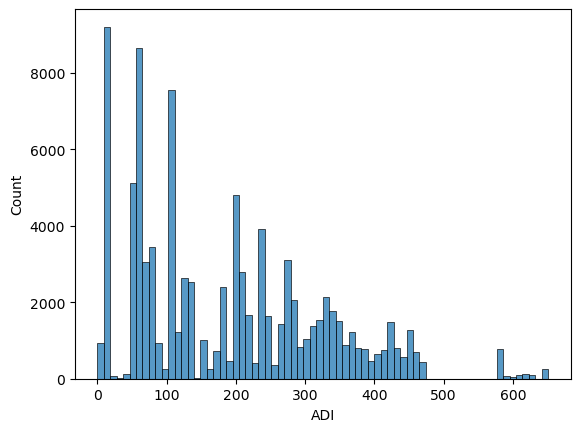

In [123]:
sns.histplot(numerical['ADI'])

In [128]:
numerical['ADI'].mean()

187.35640218303945

In [131]:
numerical['ADI'] = numerical['ADI'].fillna(numerical['ADI'].mean())
numerical['DMA'] = numerical['DMA'].fillna(numerical['DMA'].mean())
numerical['MSA'] = numerical['MSA'].fillna(numerical['MSA'].mean())

In [132]:
numerical_nulls = pd.DataFrame(numerical.isna().sum()).reset_index()
numerical_nulls.columns = ['column_name', 'nulls']
numerical_nulls[numerical_nulls['nulls']>0]

,column_name,nulls


In [133]:
numerical.to_csv('numerical.csv')

In [134]:
# Check for null values in the categorical columns.
# Use appropriate methods to clean the columns GEOCODE2

categorical_nulls = pd.DataFrame(categorical.isna().sum()).reset_index()
categorical_nulls.columns = ['column_name', 'nulls']
categorical_nulls[categorical_nulls['nulls']>0]

,column_name,nulls
0,OSOURCE,928
5,GENDER,2957
7,SOLIH,89212
8,VETERANS,84986
11,GEOCODE2,319


<AxesSubplot:xlabel='GEOCODE2', ylabel='Count'>

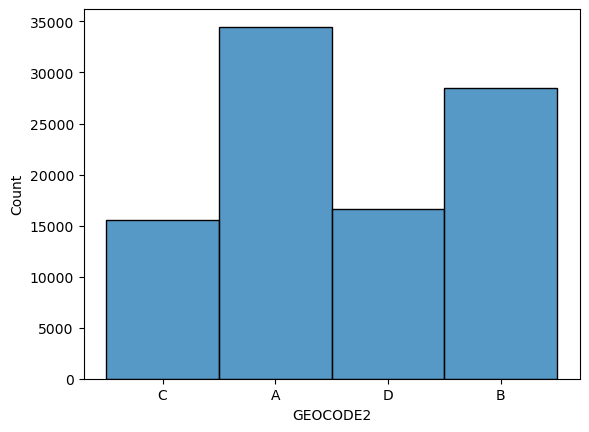

In [135]:
sns.histplot(categorical['GEOCODE2'])

In [137]:
categorical['GEOCODE2'].value_counts()

A    34484
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [138]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

In [139]:
categorical_nulls = pd.DataFrame(categorical.isna().sum()).reset_index()
categorical_nulls.columns = ['column_name', 'nulls']
categorical_nulls[categorical_nulls['nulls']>0]

,column_name,nulls
0,OSOURCE,928
5,GENDER,2957
7,SOLIH,89212
8,VETERANS,84986


In [148]:
categorical = categorical.drop(['VETERANS','SOLIH','OSOURCE','GENDER'], axis=1) 

In [149]:
categorical_nulls = pd.DataFrame(categorical.isna().sum()).reset_index()
categorical_nulls.columns = ['column_name', 'nulls']
categorical_nulls[categorical_nulls['nulls']>0]

,column_name,nulls


In [150]:
categorical.to_csv('categorical.csv')